# Hierarchical Clustering

Use scikit-learn whenever possible.

Note: putting all the preprocessing and clustering steps into a pipeline might be more trouble than it's worth. You might want to do any preprocessing like standardizing or one-hot encoding first to create a formatted training set to cluster. This is what I did in the reading notebook when I standardized the features; I first created a standardized training set and then input the standarized data into the clustering algorithm (without using a pipeline).

In [141]:
import numpy as np
import pandas as pd

In [142]:
# !pip install ISLP

## Penguins data



Recall the Palmer penguins data set.

In [143]:
df_penguins = pd.read_csv("https://dlsun.github.io/stats112/data/penguins.csv")
df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


We'll cluster the penguins based on two variables, the bill depth and flipper length. As you go, compare the results to those you already obtained from $k$-means clustering.

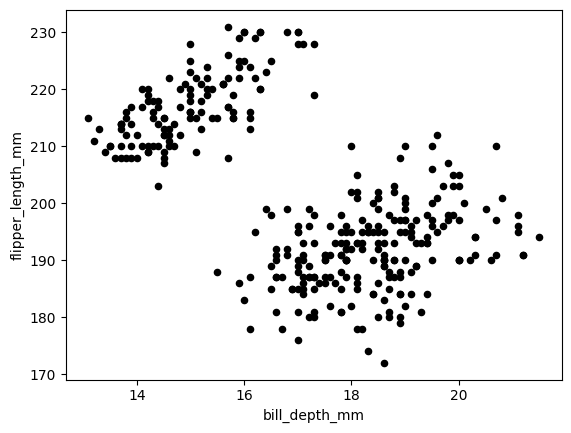

In [144]:
X_train = df_penguins[["bill_depth_mm", "flipper_length_mm"]].dropna()
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     color="black");

### Single linkage, not standardized

1\. Use hierarchical clustering with single linkage to create a dendrogram. Do NOT standardize the features first. Plot the dendrogram. What do you think is a reasonable number of clusters based on the dendrogram?

In [145]:
from sklearn.cluster import AgglomerativeClustering

hc_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single")

hc_single.fit(X_train)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

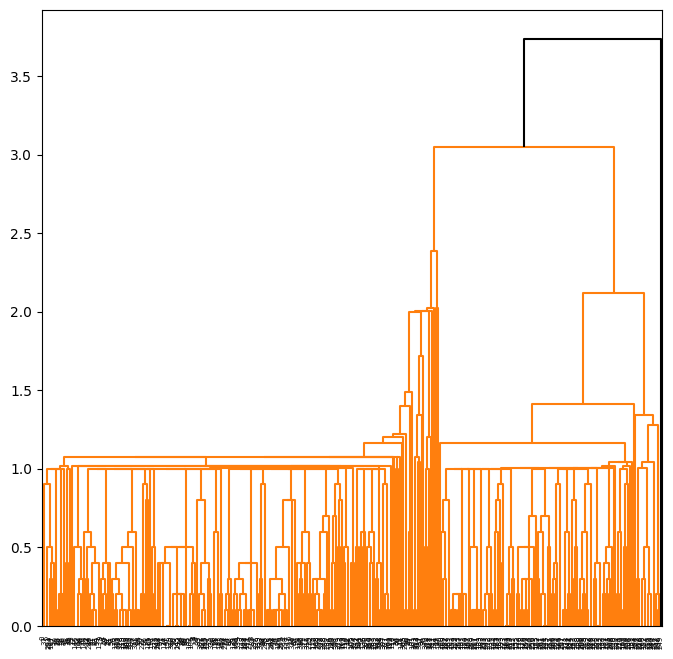

In [146]:
from scipy.cluster.hierarchy import dendrogram
from ISLP.cluster import compute_linkage
import matplotlib.pyplot as plt

linkage_single = compute_linkage(hc_single)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single,
           ax=ax,
           color_threshold=3.5,
           above_threshold_color='black');

2\. Look at the dendrogram and answer the following questions without running any code.

- If you cut the dendrogram so that there are 2 clusters, what will you see? That is, describe how the clusters will behave.
- What about 3 clusters?

3\. Cut the dendrogram so that there are 2 clusters, color the dendrogram to represent that cut, and plot the resulting cluster assignments in a scatterplot. Is this what you expected from the dendrogram?

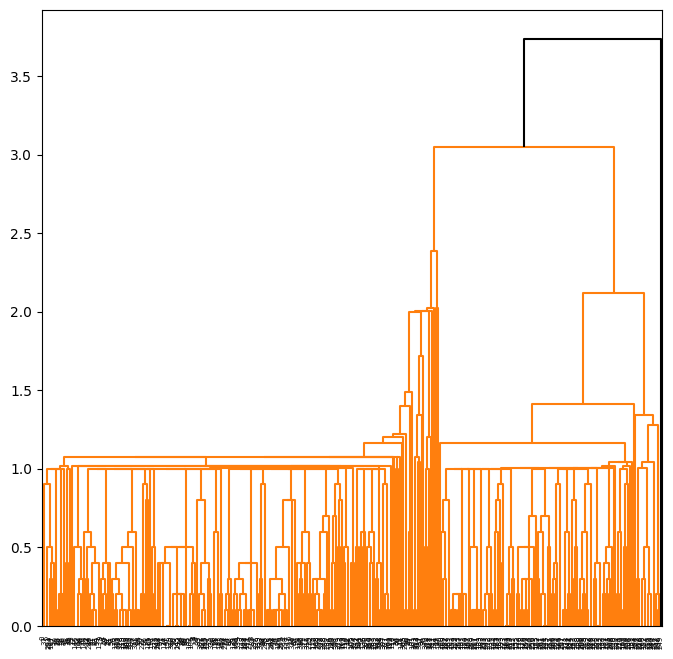

In [147]:
linkage_single = compute_linkage(hc_single)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single,
           ax=ax,
           color_threshold=3.5,
           above_threshold_color='black');

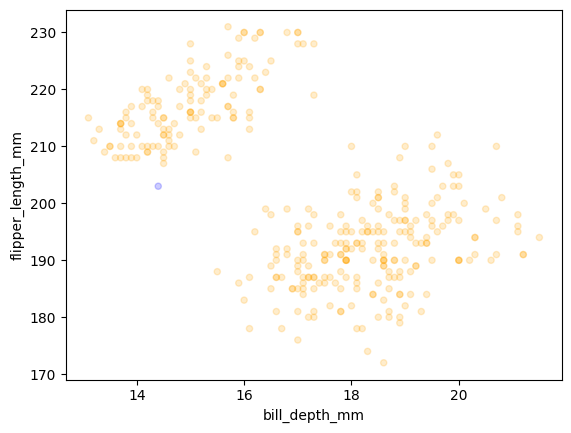

In [148]:
# Map the cluster numbers to colors.
from scipy.cluster.hierarchy import cut_tree

clusters_ = cut_tree(linkage_single, n_clusters=2).T[0]

clusters = pd.Series(clusters_).map({
    0: "orange",
    1: "blue"
})

# Plot the current cluster assignments
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, alpha=0.2);

4\. Cut the dendrogram so that there are 3 clusters, color the dendrogram to represent that cut, and plot the resulting cluster assignments in a scatterplot. Is this what you expected from the dendrogram?

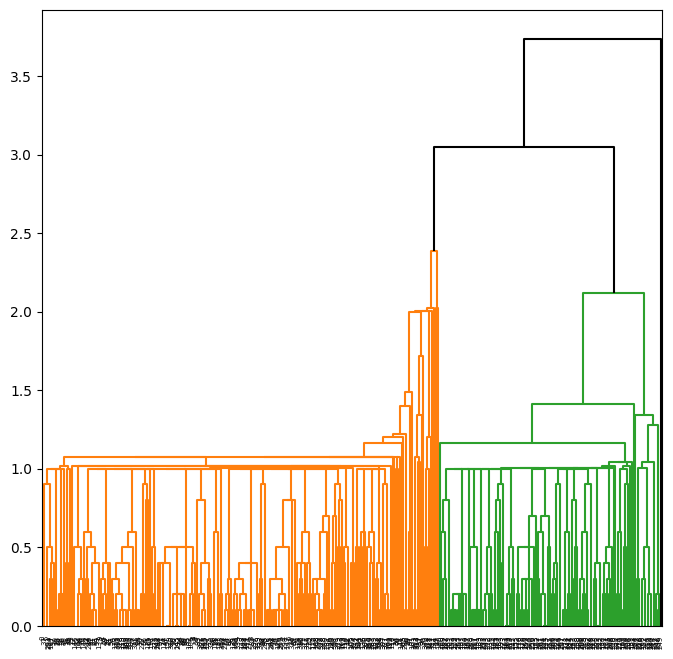

In [149]:
linkage_single = compute_linkage(hc_single)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single,
           ax=ax,
           color_threshold=2.7,
           above_threshold_color='black');

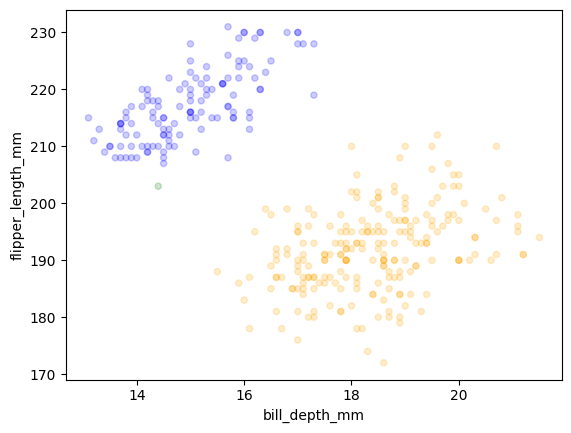

In [150]:
clusters_ = cut_tree(linkage_single, n_clusters=3).T[0]

clusters = pd.Series(clusters_).map({
    0: "orange",
    1: "blue",
    2: "green"
})

# Plot the current cluster assignments
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, alpha=0.2);

### Single linkage, standardized

1\. Use hierarchical clustering with single linkage to create a dendrogram. STANDARDIZE the features first. Plot the dendrogram. What do you think is a reasonable number of clusters based on the dendrogram?

In [151]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scale = scaler.fit_transform(X_train)

hc_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single")
hc_single.fit(X_scale)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

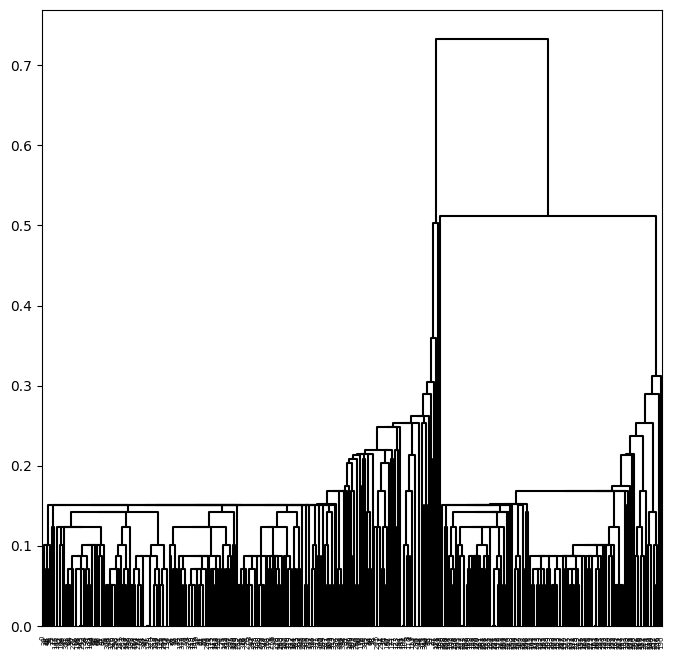

In [152]:
linkage_single_scale = compute_linkage(hc_single)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single_scale,
           ax=ax,
           color_threshold=-np.inf,
           above_threshold_color='black');

2\. Look at the dendrogram and answer the following questions without running any code.

- If you cut the dendrogram so that there are 2 clusters, what will you see? That is, describe how the clusters will behave.
- What about 3 clusters?

3\. Cut the dendrogram so that there are 2 clusters, color the dendrogram to represent that cut, and plot the resulting cluster assignments in a scatterplot. Is this what you expected from the dendrogram?

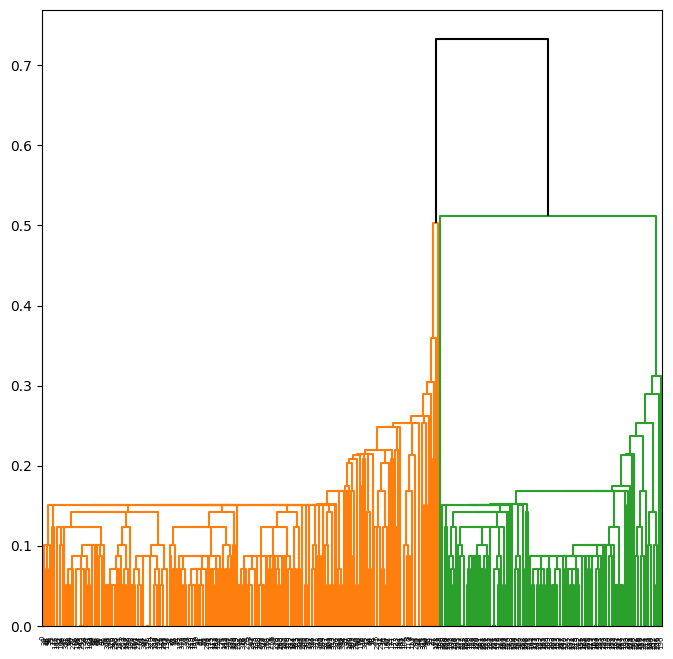

In [153]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED
linkage_single = compute_linkage(hc_single)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single,
           ax=ax,
           color_threshold=0.6,
           above_threshold_color='black');

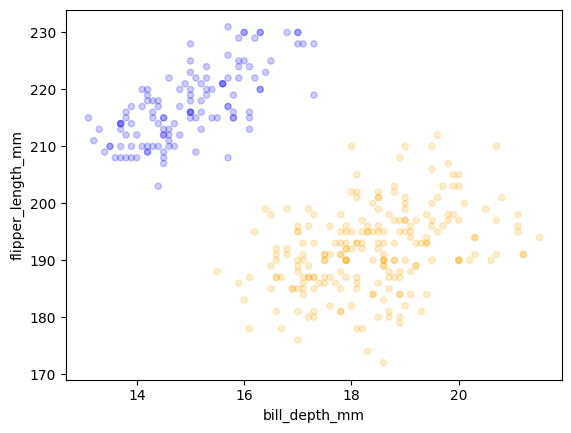

In [154]:
clusters_ = cut_tree(linkage_single, n_clusters=2).T[0]

clusters = pd.Series(clusters_).map({
    0: "orange",
    1: "blue",
})

# Plot the current cluster assignments
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, alpha=0.2);

4\. Cut the dendrogram so that there are 3 clusters, color the dendrogram to represent that cut, and plot the resulting cluster assignments in a scatterplot. Is this what you expected from the dendrogram?

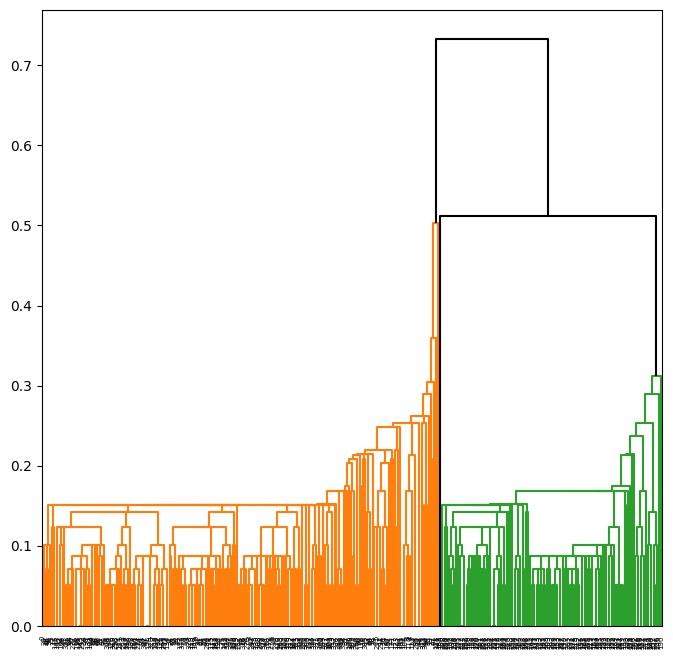

In [155]:
linkage_single = compute_linkage(hc_single)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single,
           ax=ax,
           color_threshold=0.51,
           above_threshold_color='black');

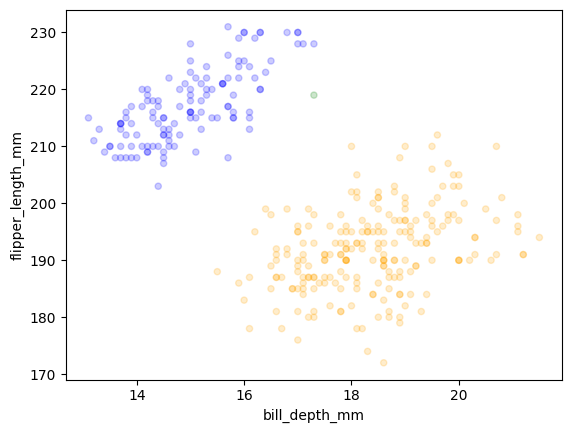

In [156]:
clusters_ = cut_tree(linkage_single, n_clusters=3).T[0]

clusters = pd.Series(clusters_).map({
    0: "orange",
    1: "blue",
    2: "green"
})

# Plot the current cluster assignments
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, alpha=0.2);

5\. Compare the results for standardized and unstandardized features. How does the choice of whether or not to standardize influence results?

Standardized features result in better results because the features are on the same scale. This is especially important for distance-based methods like hierarchical clustering.

### Complete linkage, standardized

1\. Use hierarchical clustering with complete linkage to create a dendrogram. STANDARDIZE the features first. Plot the dendrogram. What do you think is a reasonable number of clusters based on the dendrogram?

In [157]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED
hc_complete_scale = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete")
hc_complete_scale.fit(X_scale)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

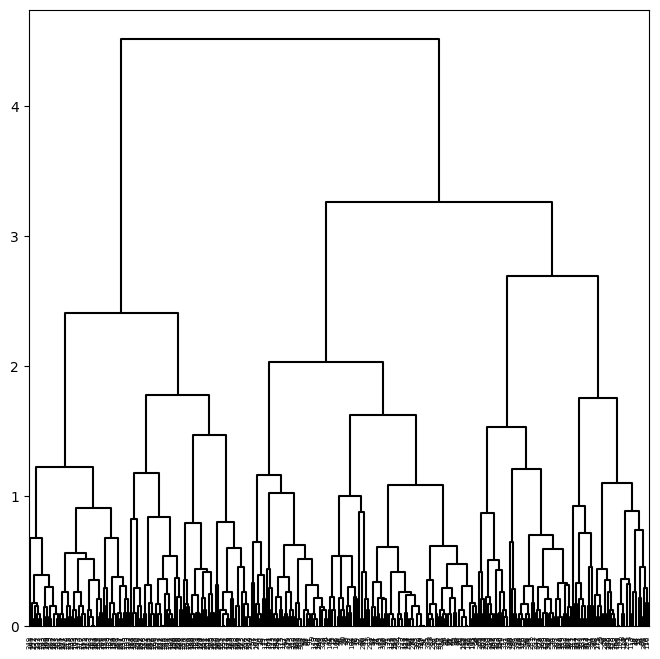

In [158]:
linkage_complete_scale = compute_linkage(hc_complete_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_complete_scale,
           ax=ax,
           color_threshold=-np.inf,
           above_threshold_color='black');

2\. Look at the dendrogram and answer the following questions without running any code.

- If you cut the dendrogram so that there are 2 clusters, what will you see? That is, describe how the clusters will behave.
- What about 3 clusters?

3\. Cut the dendrogram so that there are 2 clusters, color the dendrogram to represent that cut, and plot the resulting cluster assignments in a scatterplot. Is this what you expected from the dendrogram?

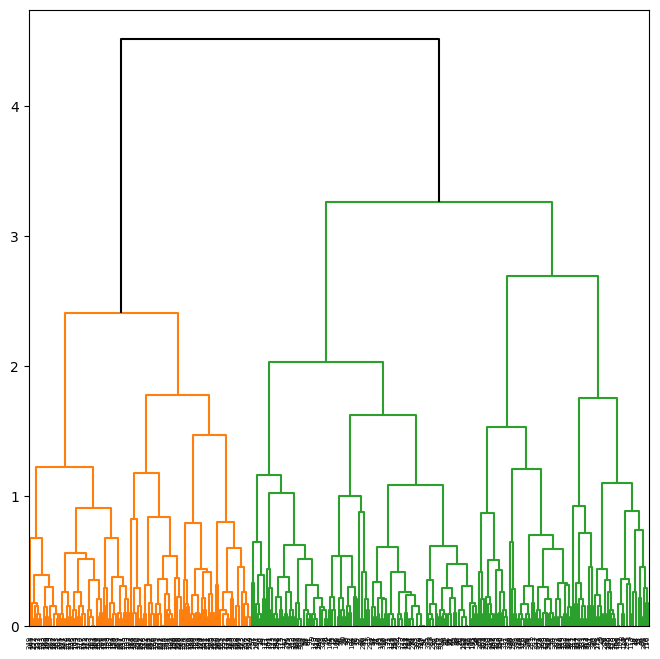

In [159]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED
linkage_complete_scale = compute_linkage(hc_complete_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_complete_scale,
           ax=ax,
           color_threshold=4,
           above_threshold_color='black');

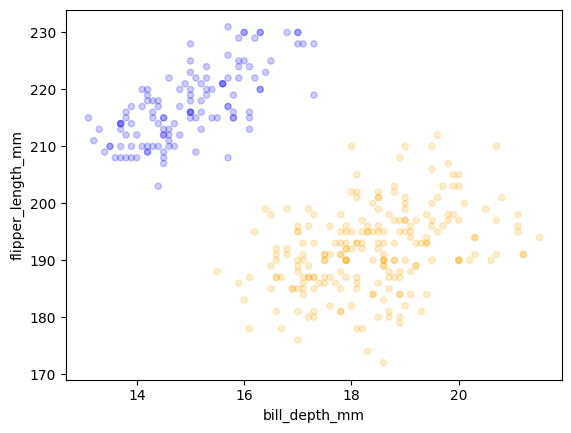

In [160]:
clusters_ = cut_tree(linkage_complete_scale, n_clusters=2).T[0]

clusters = pd.Series(clusters_).map({
    0: "orange",
    1: "blue",
})

# Plot the current cluster assignments
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, alpha=0.2);

4\. Cut the dendrogram so that there are 3 clusters, color the dendrogram to represent that cut, and plot the resulting cluster assignments in a scatterplot. Is this what you expected from the dendrogram?

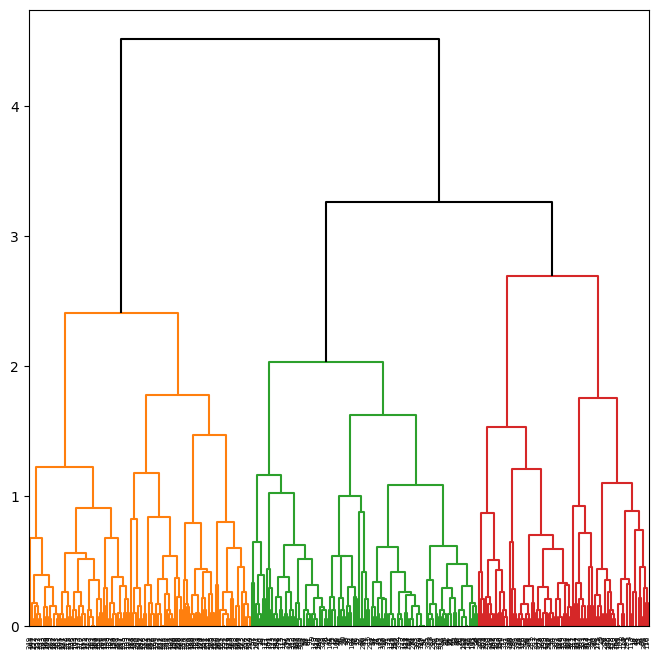

In [161]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED
linkage_complete_scale = compute_linkage(hc_complete_scale)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_complete_scale,
           ax=ax,
           color_threshold=3,
           above_threshold_color='black');

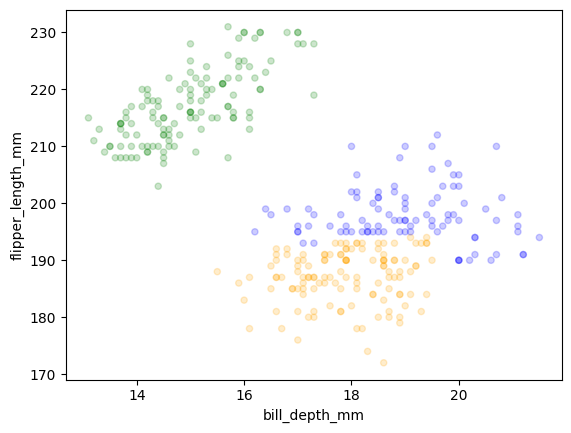

In [162]:
clusters_ = cut_tree(linkage_complete_scale, n_clusters=3).T[0]

clusters = pd.Series(clusters_).map({
    0: "orange",
    1: "blue",
    2: "green"
})

# Plot the current cluster assignments
X_train.plot.scatter(x="bill_depth_mm", y="flipper_length_mm",
                     c=clusters, alpha=0.2);

5\. Compare the results for complete and single linkage (standardized). How does the choice of linkage influence results?

In complete linkage the clusters are more compact and spread out than in single linkage. This is because complete linkage is based on the maximum distance between points in different clusters, whereas single linkage is based on the minimum distance between points in different clusters.

## Ames Housing Data

Use clustering to cluster the Ames housing data. You should try both $k$-means and hierarchical clustering. You are free to choose the number of clusters, but try at least two different values. You are also free to choose the features to include, but be sure to include both categorical and quantitative features. See the [data documentation](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt) for all the variables that are available in the data set. For hierarchical clustering, try at least two different linkages

Summarize the results to create "profiles" of the houses in each cluster. Can you come up with an "interpretation" of each cluster based on the houses in it?

In [163]:
df_ames = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")

df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [164]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED
df_ames = df_ames[["Lot Area", "Gr Liv Area", "Pool Area", "Total Bsmt SF", "TotRms AbvGrd", "Garage Cars", "SalePrice", "Neighborhood", "Bldg Type", "Lot Shape"]].dropna()

X_train = df_ames[["Lot Area", "Pool Area", "Total Bsmt SF", "TotRms AbvGrd", "Garage Cars", "SalePrice", "Neighborhood", "Bldg Type", "Lot Shape"]]

X_train

,Lot Area,Pool Area,Total Bsmt SF,TotRms AbvGrd,Garage Cars,SalePrice,Neighborhood,Bldg Type,Lot Shape
0,31770,0,1080.0,7,2.0,215000,NAmes,1Fam,IR1
1,11622,0,882.0,5,1.0,105000,NAmes,1Fam,Reg
2,14267,0,1329.0,6,1.0,172000,NAmes,1Fam,IR1
3,11160,0,2110.0,8,2.0,244000,NAmes,1Fam,Reg
4,13830,0,928.0,6,2.0,189900,Gilbert,1Fam,IR1
...,...,...,...,...,...,...,...,...,...
2925,7937,0,1003.0,6,2.0,142500,Mitchel,1Fam,IR1
2926,8885,0,864.0,5,2.0,131000,Mitchel,1Fam,IR1
2927,10441,0,912.0,6,0.0,132000,Mitchel,1Fam,Reg
2928,10010,0,1389.0,6,2.0,170000,Mitchel,1Fam,Reg


In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

preprocessor = make_column_transformer(
    (StandardScaler(), ['Lot Area', 'Pool Area', 'Total Bsmt SF', 'TotRms AbvGrd', 'Garage Cars', 'SalePrice']),
    (OneHotEncoder(handle_unknown="ignore"),
     ['Neighborhood', 'Bldg Type', 'Lot Shape'])
)

kmeans_model = make_pipeline(
    preprocessor,
    KMeans(n_clusters=4)
)

kmeans_model.fit(X_train)


/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Lot Area', 'Pool Area',
                                                   'Total Bsmt SF',
                                                   'TotRms AbvGrd',
                                                   'Garage Cars',
                                                   'SalePrice']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Neighborhood', 'Bldg Type',
                                                   'Lot Shape'])])),
                ('kmeans', KMeans(n_clusters=4))])

In [166]:
labels_ = kmeans_model.named_steps["kmeans"].labels_

labels_

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

<Axes: xlabel='Lot Area', ylabel='SalePrice'>

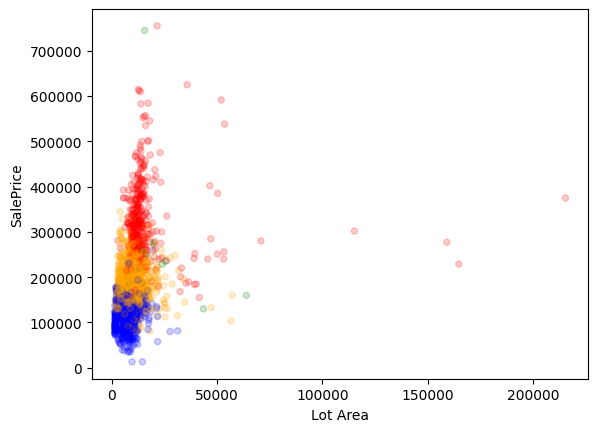

In [167]:
clusters = pd.Series(labels_).map({
    0: "orange",
    1: "blue",
    2: "green",
    3: "red"
})

df_ames.plot.scatter(x="Lot Area", y="SalePrice",
                        c=clusters, alpha=0.2)

In [176]:
X_scale = preprocessor.fit_transform(X_train).toarray()

# single linkage
hc_single = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="single")

hc_single.fit(X_scale)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

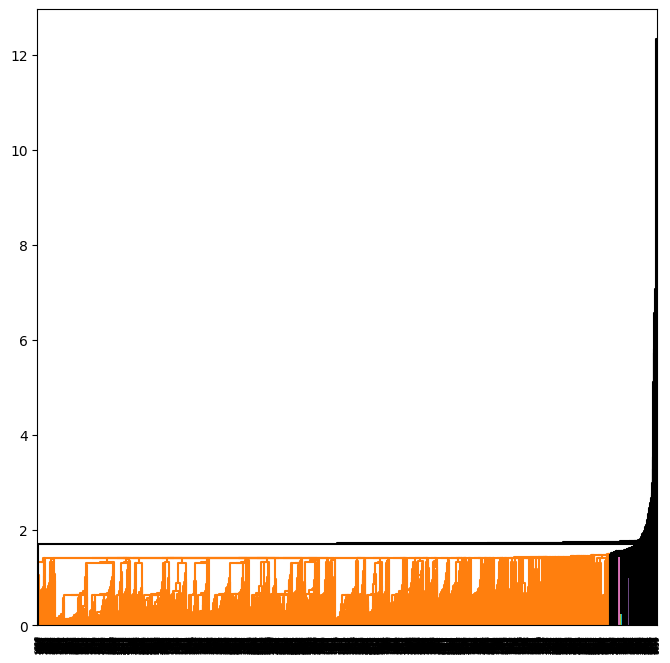

In [179]:
linkage_single_scale = compute_linkage(hc_single)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single_scale,
           ax=ax,
           color_threshold=1.5,
           above_threshold_color='black');

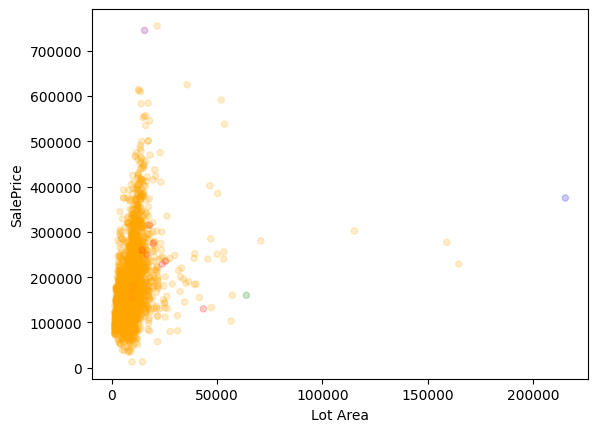

In [181]:
clusters = pd.Series(cut_tree(linkage_single_scale, n_clusters=5).T[0]).map({
    0: "orange",
    1: "blue",
    2: "green",
    3: "red",
    4: "purple"
})

X_train.plot.scatter(x="Lot Area", y="SalePrice",
                     c=clusters, alpha=0.2);

In [182]:
# complete linkage
hc_complete = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete")

hc_complete.fit(X_scale)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

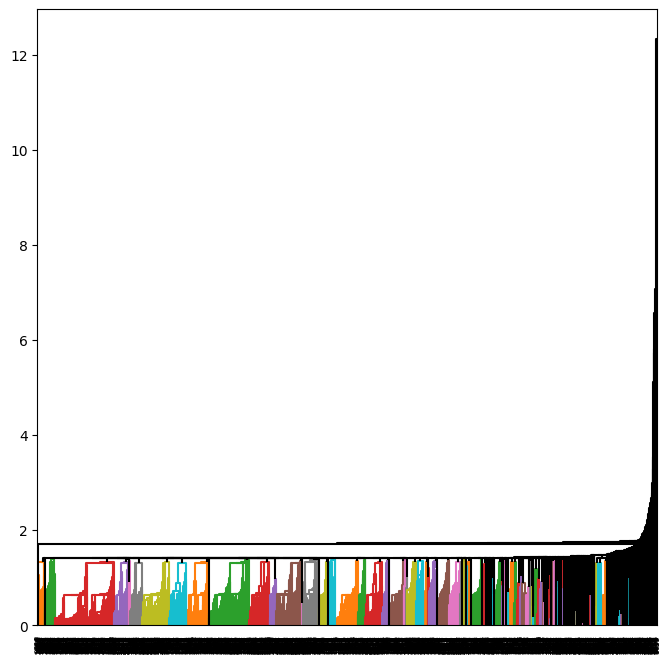

In [187]:
linkage_complete_scale = compute_linkage(hc_complete)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
dendrogram(linkage_single_scale,
           ax=ax,
           color_threshold=1.4,
           above_threshold_color='black');

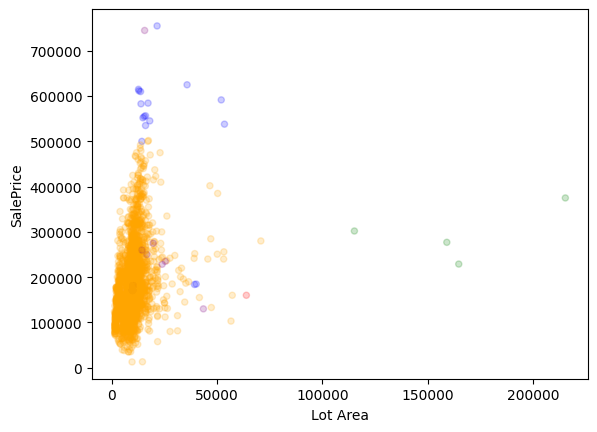

In [188]:
clusters = pd.Series(cut_tree(linkage_complete_scale, n_clusters=5).T[0]).map({
    0: "orange",
    1: "blue",
    2: "green",
    3: "red",
    4: "purple"
})

X_train.plot.scatter(x="Lot Area", y="SalePrice",
                     c=clusters, alpha=0.2);

## "Two Moons" data set

The code below reads in the "two moons" dataset, a synthetic dataset that is used to evaluate clustering algorithms. What should be the two clusters be _intuitively_?

Note: the features are on similar scales, so you don't have to standardize the features first; this is more of a conceptual exercise. But you still might want to try with and without standardizing to see if the results change.

<Axes: xlabel='x1', ylabel='x2'>

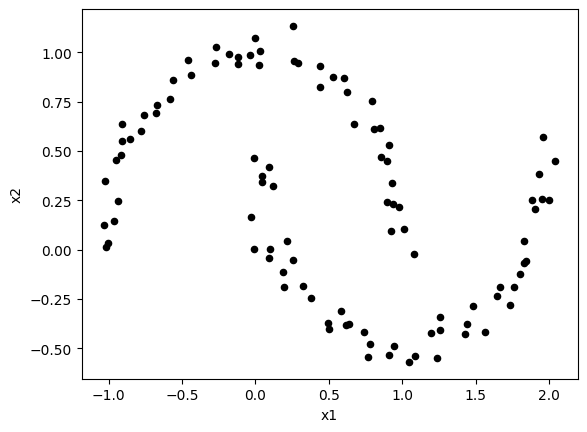

In [168]:
# TYPE YOUR CODE HERE
moons = pd.read_csv("https://dlsun.github.io/pods/data/two_moons.csv")
moons.plot.scatter(x="x1", y="x2", color="k")

1\. What do you think hierarchical clustering with single linkage will return as the clusters? Once you have a hypothesis, test it out by fitting the model to this dataset and plotting the resulting clusters.

In [169]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED

2\. What do you think hierarchical clustering with oomplete linkage will return as the clusters? Once you have a hypothesis, test it out by fitting the model to this dataset and plotting the resulting clusters.

In [170]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED

## "Satellite" data set

The code below reads in the "satellite" dataset, a synthetic dataset that is used to evaluate clustering algorithms. What should the two clusters be _intuitively_?

Note: the features are on similar scales, so you don't have to standardize the features first; this is more of a conceptual exercise. But you still might want to try with and without standardizing to see if the results change.

<Axes: xlabel='x1', ylabel='x2'>

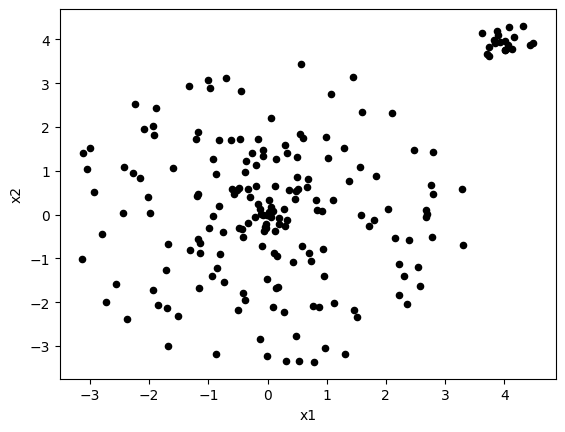

In [171]:
# TYPE YOUR CODE HERE
satellite = pd.read_csv("https://dlsun.github.io/pods/data/satellite.csv")
satellite.plot.scatter(x="x1", y="x2", color="black")

1\. What do you think hierarchical clustering with single linkage will return as the clusters? Once you have a hypothesis, test it out by fitting the model to this dataset and plotting the resulting clusters.

In [172]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED

2\. What do you think hierarchical clustering with oomplete linkage will return as the clusters? Once you have a hypothesis, test it out by fitting the model to this dataset and plotting the resulting clusters.

In [173]:
# ENTER YOUR CODE HERE. ADD AS MANY CELLS AS NEEDED